/var/folders/c3/s05h_kgx0v37w54qm6wc3x3c0000gn/T/ipykernel_22845/2172789680.py:24: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/MacBookHome/Documents/repos/co2-emissions-visualisation/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


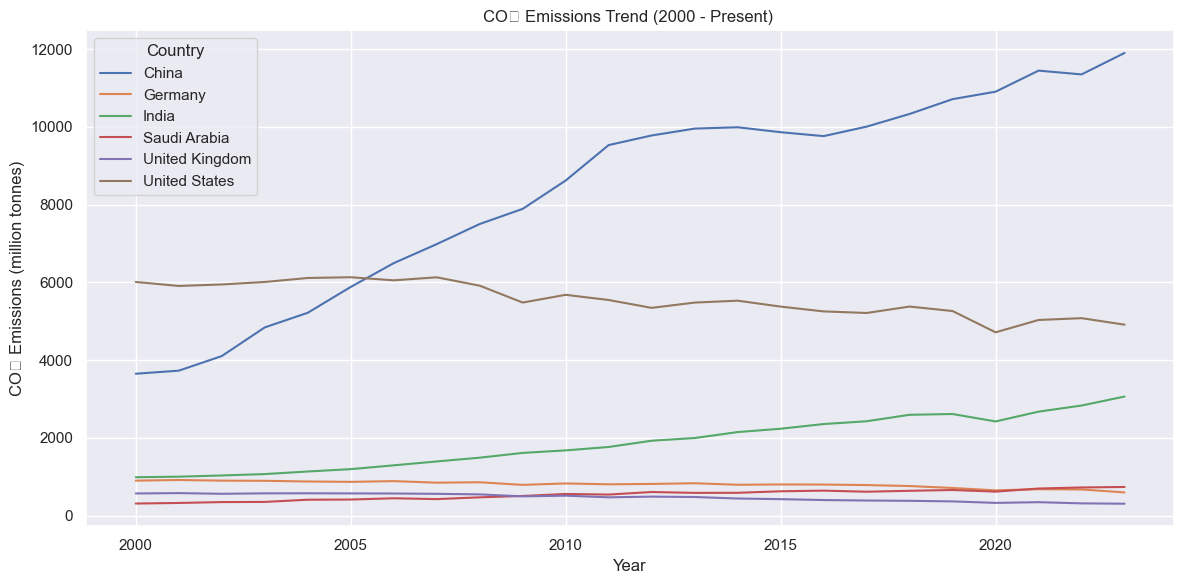

/Users/MacBookHome/Documents/repos/co2-emissions-visualisation/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


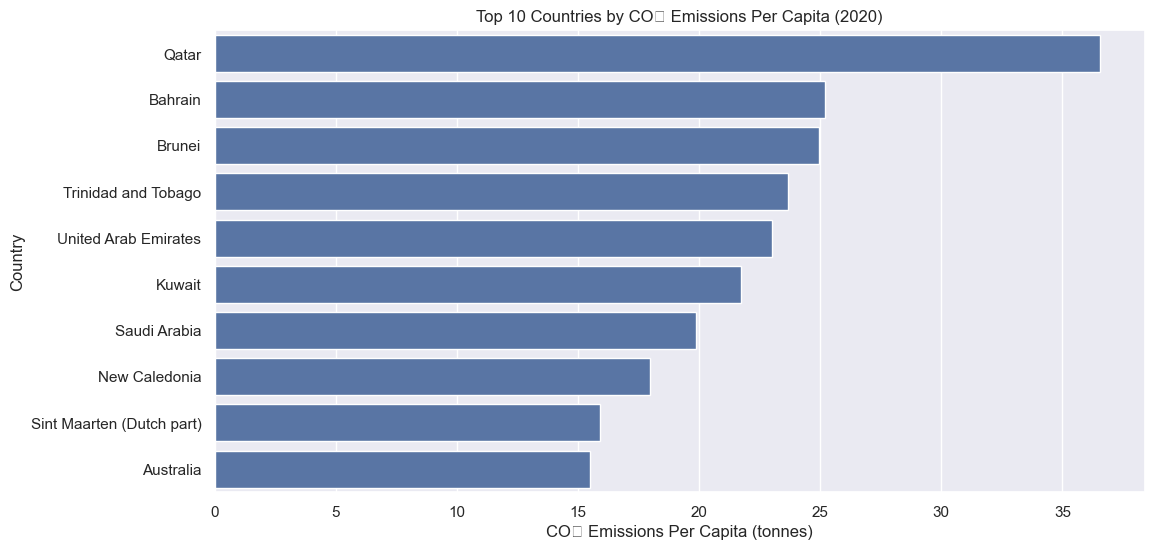

/var/folders/c3/s05h_kgx0v37w54qm6wc3x3c0000gn/T/ipykernel_22845/2172789680.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_per_capita, x='co2_per_capita', y='country', palette='Reds_r')
/var/folders/c3/s05h_kgx0v37w54qm6wc3x3c0000gn/T/ipykernel_22845/2172789680.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/MacBookHome/Documents/repos/co2-emissions-visualisation/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


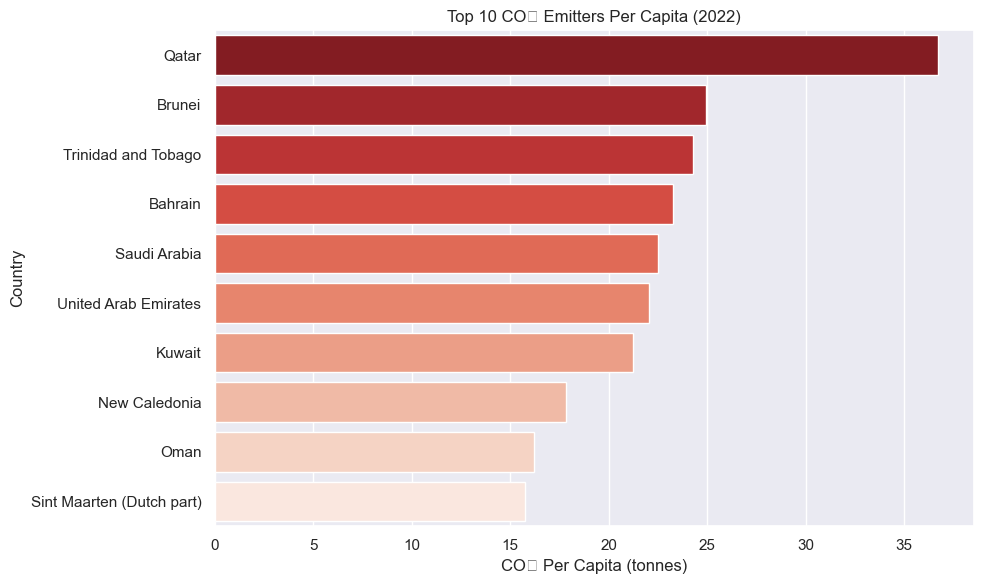

/var/folders/c3/s05h_kgx0v37w54qm6wc3x3c0000gn/T/ipykernel_22845/2172789680.py:63: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/MacBookHome/Documents/repos/co2-emissions-visualisation/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


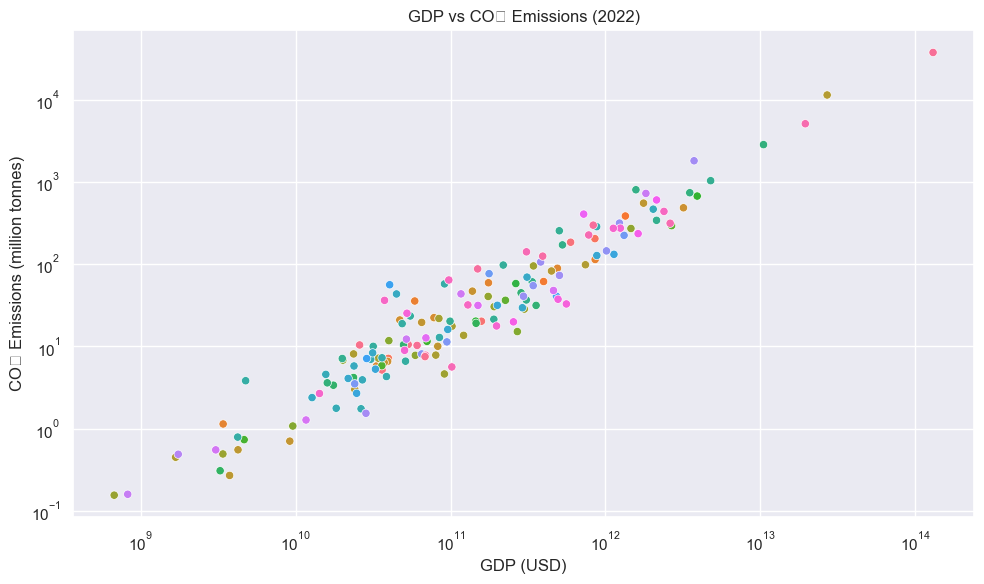

/var/folders/c3/s05h_kgx0v37w54qm6wc3x3c0000gn/T/ipykernel_22845/2172789680.py:83: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()


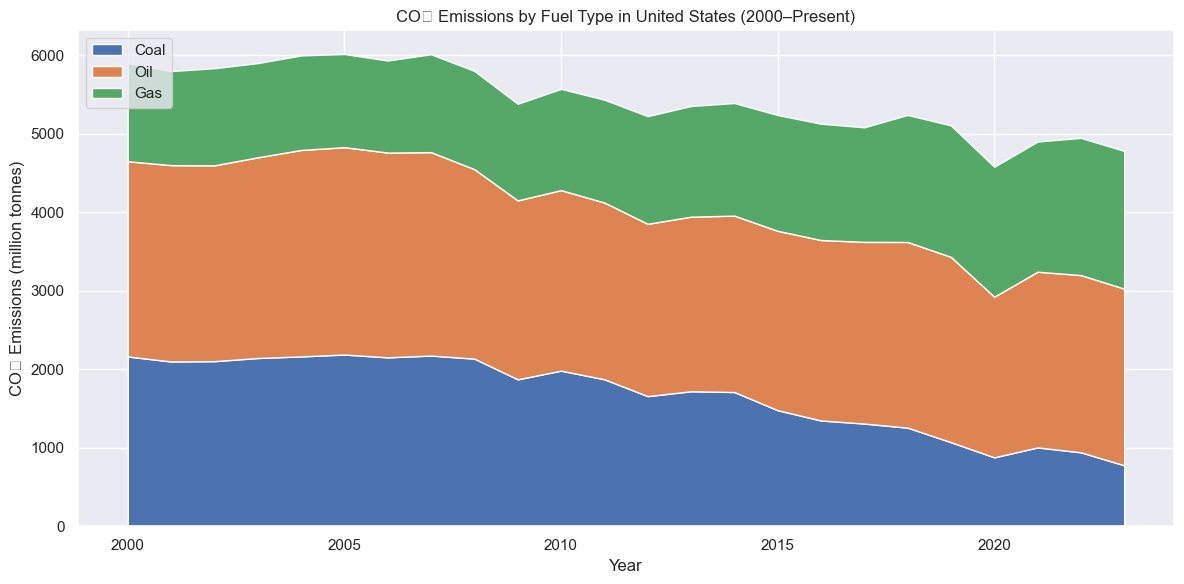

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

%matplotlib inline

import pandas as pd

df = pd.read_csv("data/owid-co2-data.csv") 
#df.head()
#df.info()

# 1- Plot emission trends for all countries - Line Graph
countries = ['United States', 'China', 'Saudi Arabia', 'India', 'Germany', 'United Kingdom']
df_filtered = df[(df['country'].isin(countries)) & (df['year'] >= 2000)]
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x='year', y='co2', hue='country')
plt.title('CO₂ Emissions Trend (2000 - Present) ')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# 2- Top 10 Countries by CO2 emissions per capita in 2020 
df_2020 = df[df['year'] == 2020]
top_countries = df_2020.sort_values('co2_per_capita', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='co2_per_capita', y='country')
plt.title('Top 10 Countries by CO₂ Emissions Per Capita (2020)')
plt.xlabel('CO₂ Emissions Per Capita (tonnes)')
plt.ylabel('Country')
plt.show()

# 3- Top 10 CO₂ emitters per capita in 2022 (most recent full year)
df_2022 = df[df['year'] == 2022]
top_per_capita = df_2022[['country', 'co2_per_capita']].dropna().sort_values('co2_per_capita', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_per_capita, x='co2_per_capita', y='country', palette='Reds_r')
plt.title('Top 10 CO₂ Emitters Per Capita (2022)')
plt.xlabel('CO₂ Per Capita (tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 4- Filter for the most recent year with GDP and CO2 data
latest_year = df[df['gdp'].notna() & df['co2'].notna()]['year'].max()
df_latest = df[(df['year'] == latest_year) & df['country'].notna()]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_latest, x='gdp', y='co2', hue='country', legend=False)
plt.title(f'GDP vs CO₂ Emissions ({latest_year})')
plt.xlabel('GDP (USD)')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# 5- Pick a country and timeframe
country = 'United States'
df_fuels = df[(df['country'] == country) & (df['year'] >= 2000)]

# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    df_fuels['year'],
    df_fuels['coal_co2'],
    df_fuels['oil_co2'],
    df_fuels['gas_co2'],
    labels=['Coal', 'Oil', 'Gas']
)
plt.legend(loc='upper left')
plt.title(f'CO₂ Emissions by Fuel Type in {country} (2000–Present)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (million tonnes)')
plt.tight_layout()
plt.show()






